In [32]:
!pip install tensorflow
!pip install keras numpy matplotlib mnist

**Loss Function** :Binar Cross Entropy ,
Categorical Cross Entropy

**Optimazer** : ADAM

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [34]:
#load dataset
(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()

In [35]:
xtrain.shape

(60000, 28, 28)

In [36]:
xtrain[0].shape

(28, 28)

In [37]:
xtrain[59999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

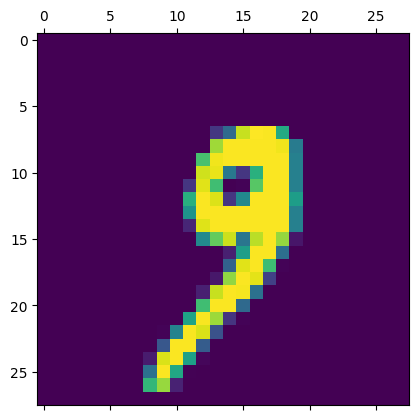

In [38]:
%matplotlib inline
plt.matshow(xtest[1000])

In [39]:
#normalization
xtest = xtest/255
xtrain = xtrain/255

xtest[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

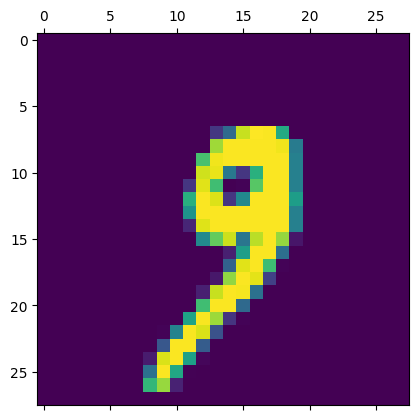

In [40]:
plt.matshow(xtest[1000])

In [41]:
#flatten the image into 28*28 to 784
#ANN takes input 28*28
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)

xtrain[1].shape  #converted to 1 dimensional

(784,)

In [42]:
#build a model sequential
# 3 layers, first 2 layers 64 neurons and relu function
#output layer 10 neuron and softmax function

model = keras.Sequential()
model.add(Dense(64,activation='relu',input_dim=784)) #input
model.add(Dense(64,activation='relu')) # hidden
model.add(Dense(10,activation='softmax')) #output

In [43]:
model.compile(
    optimizer = 'adam', #to reduce loss
    loss = 'categorical_crossentropy', # for multiclass
    metrics = ['accuracy']
)

In [44]:
#train the model
model.fit(xtrain,
          to_categorical(ytrain),
          epochs = 10,
          batch_size = 32
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2696 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1256 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0905 - accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0717 - accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0581 - accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0501 - accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0424 - accuracy: 0.9862
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0375 - accuracy: 0.9879
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0326 - accuracy: 0.9890
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.027

In [45]:
#evaluate the model
model.evaluate(xtest,to_categorical(ytest))

313/313 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9746


[0.08994467556476593, 0.9746000170707703]

In [46]:
pred = model.predict(xtest)
pred

313/313 [==============================] - 1s 3ms/step


array([[1.8642986e-11, 2.8260388e-07, 6.3141545e-07, ..., 9.9936515e-01,
        1.9303013e-09, 5.0885600e-08],
       [5.2917637e-10, 5.0606548e-08, 9.9999994e-01, ..., 1.8295655e-18,
        4.0392633e-12, 4.8858305e-20],
       [1.6332852e-07, 9.9976182e-01, 1.1093985e-04, ..., 9.7795128e-06,
        9.0127003e-05, 1.8204000e-08],
       ...,
       [5.0108555e-14, 1.0312936e-09, 9.3573023e-13, ..., 1.1963017e-06,
        1.9923250e-07, 3.3342043e-05],
       [2.3605239e-13, 1.6698723e-10, 7.2652735e-12, ..., 4.1584827e-10,
        1.9290381e-07, 6.3721405e-16],
       [4.2954879e-15, 2.4951835e-18, 3.7025326e-15, ..., 8.5873581e-23,
        1.6105833e-12, 1.2914773e-15]], dtype=float32)

In [47]:
np.argmax(pred[1])

2

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth Values')

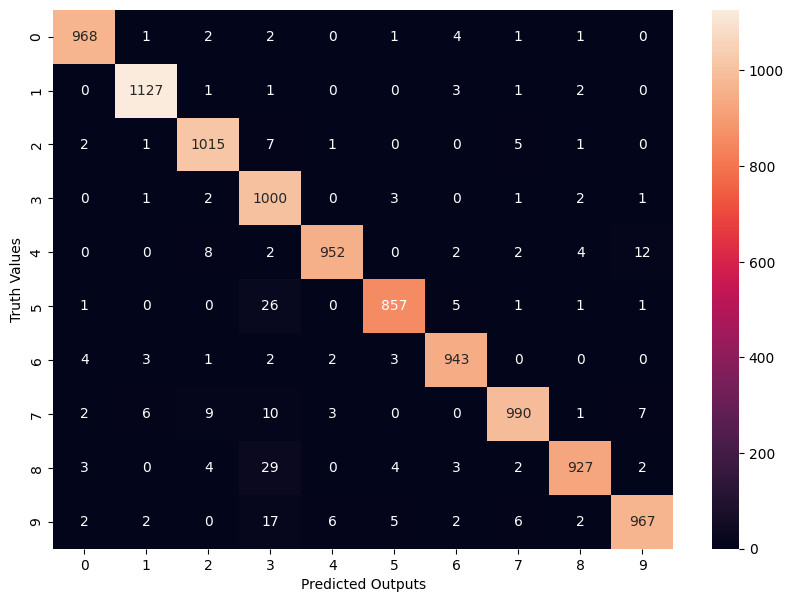

In [48]:
y_pred = model.predict(xtest)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')